In [1]:
import zipfile
import pandas as pd
import numpy as np


In [3]:
# Unzip dataset
with zipfile.ZipFile("/content/heart+disease.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/heart_disease_data")

# Load Cleveland dataset
file_path = "/content/heart_disease_data/processed.cleveland.data"
df = pd.read_csv(file_path, header=None)

# Add column names
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs",
    "restecg", "thalach", "exang", "oldpeak",
    "slope", "ca", "thal", "target"
]
df.columns = columns

print("Dataset loaded. Shape:", df.shape)
df.head()


Dataset loaded. Shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# Replace '?' with NaN and convert to numeric
df = df.replace('?', np.nan)
df = df.apply(pd.to_numeric)

# Drop rows with NaN values
df = df.dropna()

# Convert target: presence (1-4) → 1 (disease)
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

print("✅ Cleaned dataset shape:", df.shape)
df.head()


✅ Cleaned dataset shape: (297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
import os

# Create the folder if it doesn’t exist
os.makedirs("data", exist_ok=True)

# Now save the file
df.to_csv("data/cleaned_heart.csv", index=False)
print("✅ Cleaned dataset saved to data/cleaned_heart.csv")



✅ Cleaned dataset saved to data/cleaned_heart.csv


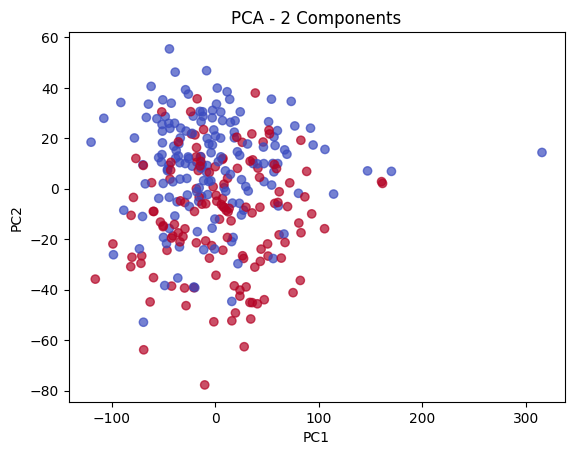

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = df.drop("target", axis=1)
y = df["target"]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", alpha=0.7)
plt.title("PCA - 2 Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


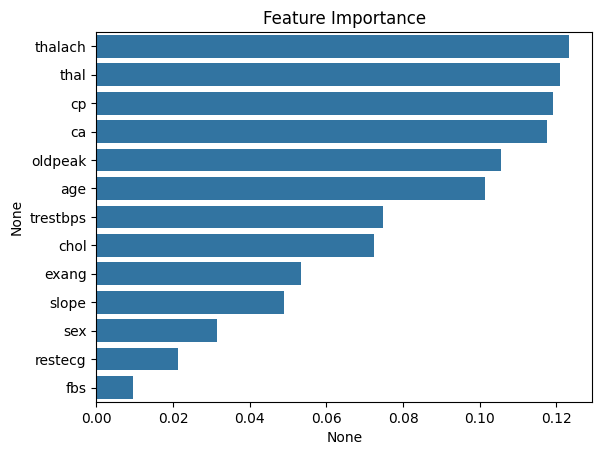

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

X = df.drop("target", axis=1)
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)

importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance")
plt.show()



Logistic Regression Accuracy: 0.8333
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



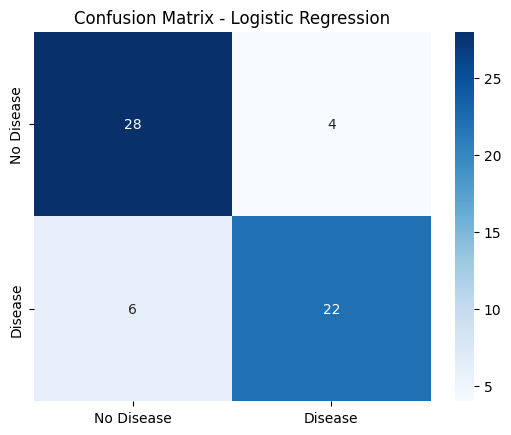


Random Forest Accuracy: 0.8667
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60



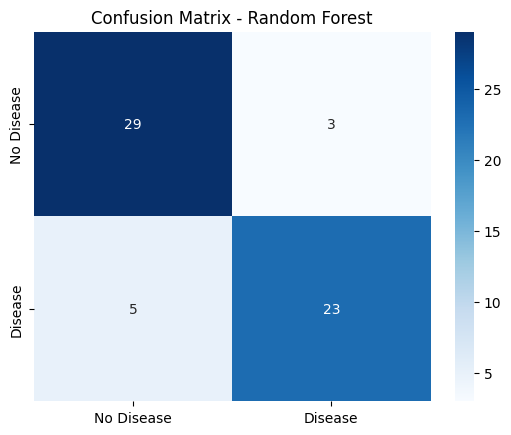


SVM Accuracy: 0.8500
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



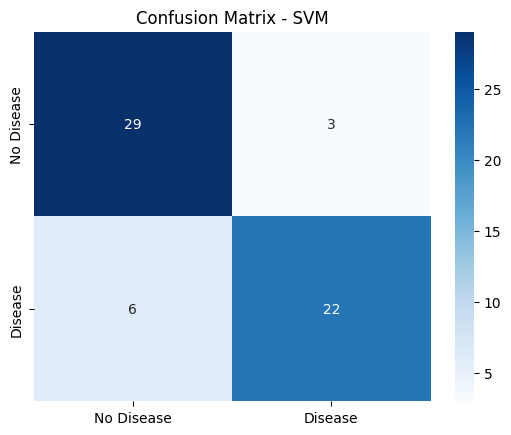

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns, matplotlib.pyplot as plt

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Disease","Disease"],
                yticklabels=["No Disease","Disease"])
    plt.title(f"Confusion Matrix - {name}")
    plt.show()



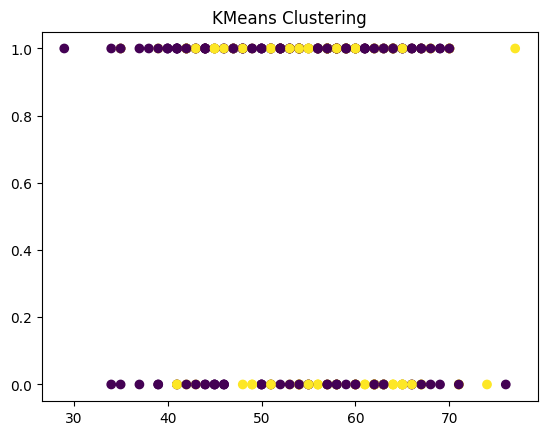

In [10]:
from sklearn.cluster import KMeans

X = df.drop("target", axis=1)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

plt.scatter(X.iloc[:,0], X.iloc[:,1], c=clusters, cmap="viridis")
plt.title("KMeans Clustering")
plt.show()


In [11]:
from sklearn.model_selection import GridSearchCV
import joblib, os

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

best_rf = grid.best_estimator_
best_acc = accuracy_score(y_test, best_rf.predict(X_test_scaled))

print("Best parameters:", grid.best_params_)
print("Best RF Accuracy:", best_acc)

os.makedirs("models", exist_ok=True)
os.makedirs("results", exist_ok=True)

joblib.dump(best_rf, "models/final_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")

with open("results/evaluation_metrics.txt", "w") as f:
    for name, acc in results.items():
        f.write(f"{name}: {acc:.4f}\n")
    f.write(f"Best RF parameters: {grid.best_params_}\n")


Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Best RF Accuracy: 0.85
